In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('mnist_train.csv', header=None)
labels = train.iloc[:, 0]
images = train.iloc[:, 1:]

test = pd.read_csv('mnist_train.csv', header=None)
test_labels = test.iloc[:, 0]
test_images = test.iloc[:, 1:]

#convert from python list into numpy array i.e. 60k to 1 array with each column a 28x28 matrix
#label = label.astype(np.uint8)
#images = np.array(images).reshape((-1, 1, 28, 28)).astype(np.uint8)

## PCA

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

COMPONENT_NUM = 35
LDA = LinearDiscriminantAnalysis(n_components=COMPONENT_NUM)
LDA.fit(images,labels)
imagesLDA = LDA.transform(images)


C:\Users\kaanu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\kaanu\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([ 0.2392286 ,  0.44103854,  0.61953549,  0.72606121,  0.82012832,
        0.88918857,  0.93892603,  0.9732168 ,  1.        ])

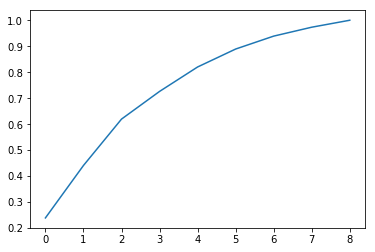

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

var_explained = LDA.explained_variance_ratio_.cumsum()
plt.plot(var_explained)
var_explained

In [5]:
imagesLDA.shape

(60000, 9)

In [6]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(imagesLDA, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
test_imagesLDA = LDA.transform(test_images)
test_predict = svc.predict(test_imagesLDA)

In [8]:
test_predict.shape

(60000,)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, test_predict)

0.94158333333333333